# Assignment 2 - Machine Learning Basics

## *Emma Xuecong Sun*
Netid:  *xs58*

Github link: https://github.com/xuecongsun/machine-learning-course

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1. A flexible model will work better, as it will be less likely to overfit due to the large sample size. Moreover, a flexible model reduces bias. As bias is reduced and variance inflates not so much, the model's overall generalization error will be less.
2. An inflexible model will work better, as the model may overfit because the number of observations n is small. Overfitting may cause variance to be bigger, and the small sample size helps less with bias. As a result, the model's overall generalization error will be more.
3. A flexible model will work better, as we need to give the model more freedom to fit a highly non-linear trend, thus reducing the bias. If we use inflexible model and wrongly assume the model, it will cause the bias to be huge, causing the model's overall generalization error to be huge.
4. An inflexible model will work better as a flexible model will factor in even more noise, on top the error terms of high variance, causing the model's overall generalization error to be higher.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

(a)Regression problem as the response we model, CEO salary, is a continuous variable. We are most interested in inference for that problem, as the question indicates wanting to understand the factors affect CEO salary, instead of merely predicting. The sample size n is 500, the number of predictors are 3.

(b)Classification problem as the response we model, whether the launch is a success or a failure, is a categorical variable. This is a prediction problem, as we want to get the predicted outcome as accurate as possible, instead of understanding what factors cause that success or failure. The sample size n is 20, the number of predictors is 13.

(c)Regression problem as the response we model, the % change in the US dollar in relation to weekly changes in world stock markets, is a continuous variable. We are interested in prediction for the problem. The sample size is 52, as there are 52 weeks in a month. The number of predictors is 3.


# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

In [131]:
import numpy as np
X_train_low = np.loadtxt('data/A2_X_train_low.csv',delimiter= ',')
print(X_train_low.shape)
y_train_low = np.loadtxt('data/A2_y_train_low.csv')
print(y_train_low.shape)
X_train_high = np.loadtxt('data/A2_X_train_high.csv', delimiter=',')
print(X_train_high.shape)
y_train_high = np.loadtxt('data/A2_y_train_high.csv')
print(y_train_high.shape)

X_test_low = np.loadtxt('data/A2_X_test_low.csv',delimiter= ',')
print(X_test_low.shape)
y_test_low = np.loadtxt('data/A2_y_test_low.csv')
print(y_test_low.shape)
X_test_high = np.loadtxt('data/A2_X_test_high.csv', delimiter=',')
print(X_test_high.shape)
y_test_high = np.loadtxt('data/A2_y_test_high.csv')
print(y_test_high.shape)


(1000, 2)
(1000,)
(1000, 100)
(1000,)
(1000, 2)
(1000,)
(1000, 100)
(1000,)


In [132]:
from scipy.spatial import distance

In [133]:
# (a) Write your own kNN classifier

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x = np.zeros((1000,2))
        self.y = np.zeros((1000,))
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y
    
    @timer
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        
        #initialize dst to record the index of training vec and the distance between test vec and training vec
       
        
        #nested to loop to calculate distance between test vec and each training vec
        for i in range(1000):
            testvec = x[i]
           
            dst={}
            for j in range(1000):
                trainingvec = self.x[j]
                dst.update({j:distance.euclidean(testvec, trainingvec)})
            
            #take five neighbors with shortest distance
            neighbors = sorted(dst.items(), key = lambda x : x[1])[0:k]
           
            
            #take the neighbors' training y
            
            neighborsresults = [self.y[j[0]] for j in neighbors]
           
            
            #evaluate the neighbors' training y and make a decision
            if neighborsresults.count(1) > neighborsresults.count(0):
                y_hat_testvec = 1
            else:
                y_hat_testvec = 0
            
            y_hat.append(y_hat_testvec) 
           
                
        # Return the estimated targets
        
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [134]:
import time
def timer(f):
    def timed(*args,**kwargs):
        start = time.time()
        result = f(*args, **kwargs)
        end = time.time()
        elapsed = end - start
        return result, elapsed
    return timed
    

In [130]:
KNN5 = Knn()
#train the low dimension set
KNN5.fit(X_train_low, y_train_low)
y_hat_result, elapsed=KNN5.predict(X_test_low,5)
low_accuracy = accuracy(y_test_low, y_hat_result)
print('Time taken by KNN:{}, Accuracy of KNN:{}'.format(elapsed,low_accuracy))

Time taken by KNN:11.483741044998169, Accuracy of KNN:0.925


In [141]:
#train the high dimension set
KNN5high = Knn()
KNN5high.fit(X_train_high, y_train_high)
y_hat_result_high, elapsed = KNN5high.predict(X_test_high,5)
high_accuracy = accuracy(y_test_high, y_hat_result_high)
print('Time taken by KNN for high dimension set:{}, Accuracy of KNN for high dimension set:{}'.format(elapsed,high_accuracy))

Time taken by KNN for high dimension set:13.05488395690918, Accuracy of KNN for high dimension set:0.993


In [139]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_low, y_train_low) 
start_sklearn_low = time.time()
y_hat_sklearn_low = neigh.predict(X_test_low)
end_sklearn_low = time.time()
elapsed_sklearn_low = end_sklearn_low - start_sklearn_low
sklearn_low_accuracy = accuracy(y_test_low, y_hat_sklearn_low)
print('Time taken by sklearn KNN for low dimension:{}, Accuracy of sklearn KNN for low dimension:{}'.format(elapsed_sklearn_low, sklearn_low_accuracy))


Time taken by sklearn KNN for low dimension:0.0043218135833740234, Accuracy of sklearn KNN for low dimension:0.925


In [140]:
neigh.fit(X_train_high, y_train_high) 
start_sklearn_high = time.time()
y_hat_sklearn_high = neigh.predict(X_test_high)
end_sklearn_high = time.time()
elapsed_sklearn_high = end_sklearn_high - start_sklearn_high
sklearn_high_accuracy = accuracy(y_test_high, y_hat_sklearn_high)
print('Time taken by sklearn KNN for high dimension:{}, Accuracy of sklearn KNN for high dimension:{}'.format(elapsed_sklearn_high, sklearn_high_accuracy))



Time taken by sklearn KNN for high dimension:0.16672587394714355, Accuracy of sklearn KNN for high dimension:0.993


d) Sklearn's KNN class runs much faster than my own constructed. However, both algorithms achieve similar accuracies. The accuracy for high dimension set from my own constructed and sklearn are both 0.925, and the oone for low dimension set are both 0.993. 

e) One drawback for slow training is that, the machine learning algorithm can't be used for real time evaluation. Many machine learning algorithms right now have to be real time that they take in new values and immediately churn out new responses. In this case, algorithms that take a long time to train is not ideal to be used. It is less efficient, more resource-consuming and more computationally expensive.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [406]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

In [429]:
#a)
import pandas as pd

testpoint = np.array([[0,0,0]])

dist=[]
for each in X:
    dist.append(round(distance.euclidean(each, testpoint),2))

dist = np.array(dist)
dist = dist.reshape(-1,1)
obs = np.arange(1,7)

dist_training = np.c_[obs, X, y, dist]

dist_training_df = pd.DataFrame(dist_training, columns = ['obs','x1','x2','x3', 'y', 'dist from test'])


dist_training_df.set_index('obs',inplace=True)


dist_training_df


    

,x1,x2,x3,y,dist from test
obs,,,,,
1,0,3,0,r,3.0
2,2,0,0,r,2.0
3,0,1,3,r,3.16
4,0,1,2,b,2.24
5,-1,0,1,b,1.41
6,1,1,1,r,1.73


b) When K=1, test point's closest neighbor will be the observation which has the shortest distance from it. In this case, it will be observation 5. Thus test point's predication will be blue, as that's observation 5's response.




c) When K=3, test point's 3 closest neighbors will be observation 2,5,6. Among 3 of them, 2 points have response as red, the other one as blue. Therefore, the predication for test point will be red.

d) When the Bayes'optimal boundary is highly non-linear, we would expect the K to be small, so that the model will be more flexible and can reduce the model bias more. Although it will cause the model variance to increase, the bias will be huge if we made the K large and gives it a less flexible model.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

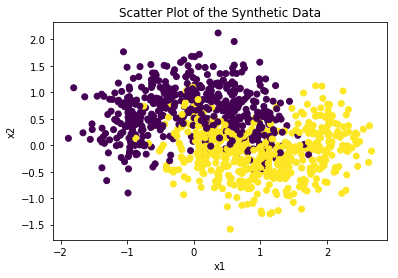

In [291]:
#a) & b)

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

dataset = make_moons(1000, noise = 0.35)

x = dataset[0][:,0]
y = dataset[0][:,1]
c = dataset[1]

plt.scatter(x, y, c = c)
plt.title("Scatter Plot of the Synthetic Data")
plt.xlabel("x1")
plt.ylabel("x2")
pass


In [293]:
#c)
from sklearn.neighbors import KNeighborsClassifier
#create 3 samples

#create 3 random sample of index
train1idx = np.random.choice(np.arange(1000),100)
train2idx = np.random.choice(np.arange(1000),100)
train3idx = np.random.choice(np.arange(1000),100)

train1x = dataset[0][train1idx]
train1y = dataset[1][train1idx]
train2x = dataset[0][train2idx]
train2y = dataset[1][train2idx]
train3x = dataset[0][train3idx]
train3y = dataset[1][train3idx]


#fit KNN classifiers
#K=1
neigh = KNeighborsClassifier(n_neighbors=1)
train1_1 = neigh.fit(train1x, train1y)
train2_1 = neigh.fit(train2x, train2y)
train3_1 = neigh.fit(train3x, train3y)


#K=25
neigh = KNeighborsClassifier(n_neighbors=25)
train1_25 = neigh.fit(train1x, train1y)
train2_25 = neigh.fit(train2x, train2y)
train3_25 = neigh.fit(train3x, train3y)

#K=50
neigh = KNeighborsClassifier(n_neighbors=50)
train1_50 = neigh.fit(train1x, train1y)
train2_50 = neigh.fit(train2x, train2y)
train3_50 = neigh.fit(train3x, train3y)



    

Text(0.5,0.98,'KNN Boundaries for Different Choice of K on Different Random Samples')

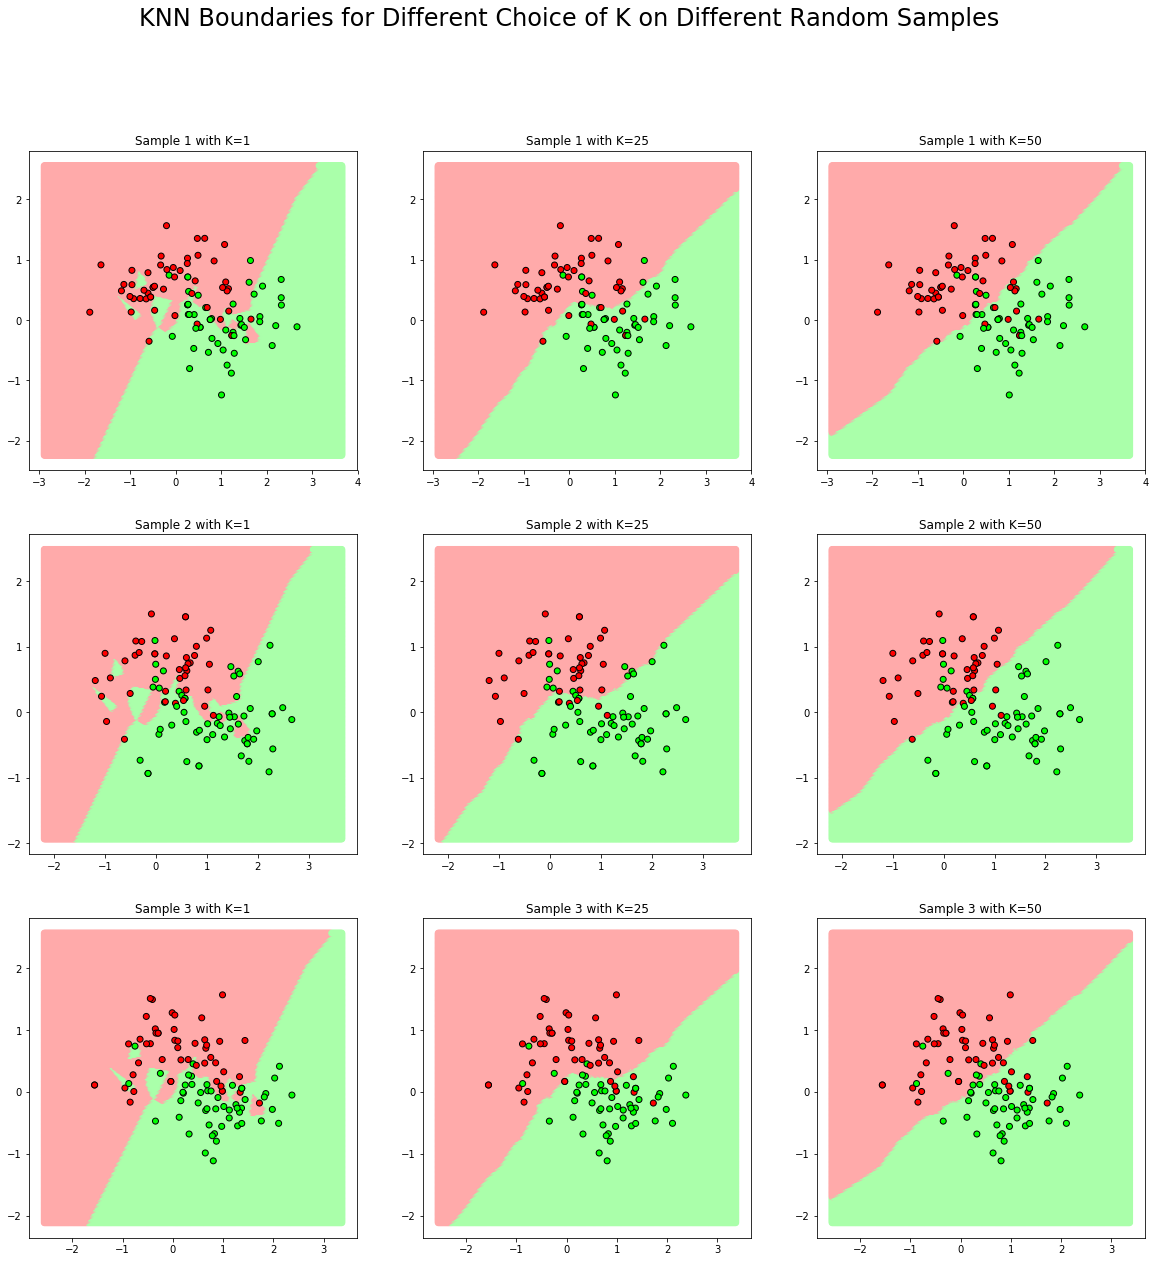

In [431]:
#d)
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

#step size in mesh
h = 0.02
#for training set 1
x_min_1, x_max_1 = train1x[:, 0].min() - 1, train1x[:, 0].max() + 1
y_min_1, y_max_1 = train1x[:, 1].min() - 1, train1x[:, 1].max() + 1
xx1, yy1 = np.meshgrid(np.arange(x_min_1, x_max_1, h), np.arange(y_min_1, y_max_1, h))
Z1_1 = train1_1.predict(np.c_[xx1.ravel(), yy1.ravel()])
Z1_25 = train1_25.predict(np.c_[xx1.ravel(), yy1.ravel()])
Z1_50 = train1_50.predict(np.c_[xx1.ravel(), yy1.ravel()])

fig, axes = plt.subplots(3,3, figsize = (20,20))
axes[0,0].scatter(xx1.ravel(),yy1.ravel(), c = Z1_1, cmap = cmap_light)
axes[0,0].scatter(train1x[:,0],train1x[:,1], c = train1y, cmap = cmap_bold, edgecolor = 'k')
axes[0,0].set_title("Sample 1 with K=1")
axes[0,1].scatter(xx1.ravel(),yy1.ravel(), c = Z1_25, cmap = cmap_light)
axes[0,1].scatter(train1x[:,0],train1x[:,1], c = train1y, cmap = cmap_bold, edgecolor = 'k')
axes[0,1].set_title("Sample 1 with K=25")
axes[0,2].scatter(xx1.ravel(),yy1.ravel(), c = Z1_50, cmap = cmap_light)
axes[0,2].scatter(train1x[:,0],train1x[:,1], c = train1y, cmap = cmap_bold, edgecolor = 'k')
axes[0,2].set_title("Sample 1 with K=50")


#for training set 2
x_min_2, x_max_2 = train2x[:, 0].min() - 1, train2x[:, 0].max() + 1
y_min_2, y_max_2 = train2x[:, 1].min() - 1, train2x[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min_2, x_max_2, h), np.arange(y_min_2, y_max_2, h))
Z2_1 = train2_1.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z2_25 = train2_25.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z2_50 = train2_50.predict(np.c_[xx2.ravel(), yy2.ravel()])

axes[1,0].scatter(xx2.ravel(),yy2.ravel(), c = Z2_1, cmap = cmap_light)
axes[1,0].scatter(train2x[:,0],train2x[:,1], c = train2y, cmap = cmap_bold, edgecolor = 'k')
axes[1,0].set_title("Sample 2 with K=1")
axes[1,1].scatter(xx2.ravel(),yy2.ravel(), c = Z2_25, cmap = cmap_light)
axes[1,1].scatter(train2x[:,0],train2x[:,1], c = train2y, cmap = cmap_bold, edgecolor = 'k')
axes[1,1].set_title("Sample 2 with K=25")
axes[1,2].scatter(xx2.ravel(),yy2.ravel(), c = Z2_50, cmap = cmap_light)
axes[1,2].scatter(train2x[:,0],train2x[:,1], c = train2y, cmap = cmap_bold, edgecolor = 'k')
axes[1,2].set_title("Sample 2 with K=50")

#for training set 3
x_min_3, x_max_3 = train3x[:, 0].min() - 1, train3x[:, 0].max() + 1
y_min_3, y_max_3 = train3x[:, 1].min() - 1, train3x[:, 1].max() + 1
xx3, yy3 = np.meshgrid(np.arange(x_min_3, x_max_3, h), np.arange(y_min_3, y_max_3, h))
Z3_1 = train3_1.predict(np.c_[xx3.ravel(), yy3.ravel()])
Z3_25 = train3_25.predict(np.c_[xx3.ravel(), yy3.ravel()])
Z3_50 = train3_50.predict(np.c_[xx3.ravel(), yy3.ravel()])

axes[2,0].scatter(xx3.ravel(),yy3.ravel(), c = Z3_1, cmap = cmap_light)
axes[2,0].scatter(train3x[:,0],train3x[:,1], c = train3y, cmap = cmap_bold, edgecolor = 'k')
axes[2,0].set_title("Sample 3 with K=1")
axes[2,1].scatter(xx3.ravel(),yy3.ravel(), c = Z3_25, cmap = cmap_light)
axes[2,1].scatter(train3x[:,0],train3x[:,1], c = train3y, cmap = cmap_bold, edgecolor = 'k')
axes[2,1].set_title("Sample 3 with K=25")
axes[2,2].scatter(xx3.ravel(),yy3.ravel(), c = Z3_50, cmap = cmap_light)
axes[2,2].scatter(train3x[:,0],train3x[:,1], c = train3y, cmap = cmap_bold, edgecolor = 'k')
axes[2,2].set_title("Sample 3 with K=50")

fig.suptitle("KNN Boundaries for Different Choice of K on Different Random Samples", fontsize = 24)





e) For each row, as k increases, the decision boundary becomes smoother and varies less. For each column, the decision boundary looks similar. I think the best decision boundary separating the two groups of data is when k=25. The decision boundary is not as overfitting as k=1, also not as arbitrary as k=50. The boundary that varies the most is when k=1

d) When k = 1, the bias of the model is small, the decision boundary closely follows the variation in points. However, the model's variance is also high. For different set of sample data, the boundary will change. As k increases, the decision boundary becomes less variable for different samples, observed when k=25 and k=50. However, the decision boundary also appears less adherent to the actual points, thus resulting in higher bias. As such, we can see when a model has small bias, it tends to have high variance and vice versa. This is called bias-variance tradeoff.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [331]:
testset = make_moons(1000, noise = 0.35)
trainingset = dataset

In [332]:
errors = []
for i in range(1,501):
    newneigh = KNeighborsClassifier(n_neighbors=i)
    newneigh.fit(trainingset[0], trainingset[1])
    predict = newneigh.predict(testset[0])
    error = 1 - accuracy(testset[1], predict)
    errors.append(error)
    

Text(0,0.5,'Fraction of Mislabeled Data Points')

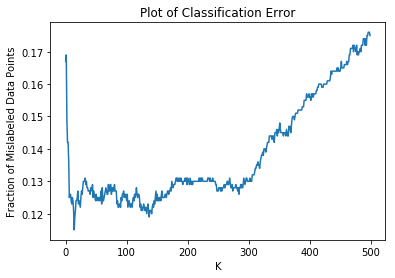

In [333]:
plt.plot(errors)
plt.title("Plot of Classification Error")
plt.xlabel('K')
plt.ylabel('Fraction of Mislabeled Data Points')

c) the error rate is high at the beginning when k is very small, and it decreases as k increases. However, after k passes the number that makes error rate hit the trough, error rate increases as k increases.

d) As error rate goes up, the bias of model also goes up. Therefore, the model with highest bias will be k=500. Model with highest variance will be the most flexible model, which means model with very small K. In this case, the model with highest variancec will be k=1

In [335]:
#e)
errordict = {}
for i,j in enumerate(errors):
    errordict.update({i:j})


result = sorted(errordict.items(), key = lambda x:x[1])

optimal_k = result[0][0]+1  
print('The optimal_k is:{}'.format(optimal_k))




The optimal_k is:15


f) For parametric models, number of parameters control the flexibility of the model. The more parameters are, the more flexible the model is. For non-parametric models, it will be case-by-case. However, in general, the more shapes a model can potentially fit, the more flexible it is. 

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [277]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

Text(0,0.5,'y')

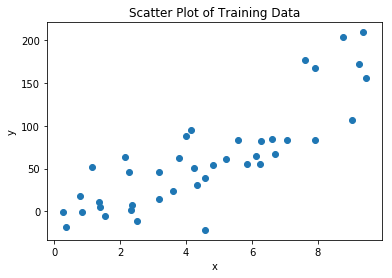

In [338]:
#a)

plt.scatter(x_train,y_train)
plt.title("Scatter Plot of Training Data")
plt.xlabel("x")
plt.ylabel("y")

In [363]:
#b)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train_new = np.array(x_train).reshape(-1,1)
y_train_new = np.array(y_train)
reg = LinearRegression().fit(x_train_new, y_train_new)
print("Formula for Regression is: y = {} +{}x".format(reg.intercept_,reg.coef_))
print("The R square value for the model on training data is {}".format(reg.score(x_train_new,y_train_new)))
pred = reg.predict(x_train_new)
MSE = mean_squared_error(pred, y_train_new)
print("The MSE for model on training data is {}".format(MSE))

Formula for Regression is: y = -21.73078292905422 +[18.30320685]x
The R square value for the model on training data is 0.7014590913812251
The MSE for model on training data is 1052.5853662498014


In [362]:
#c)

#it seems there's a curving up trend between x and y. I will try square x as transformation

x_square_train_new = np.square(x_train_new)
regtrans_x_train_new = np.c_[x_train_new, x_square_train_new]
regtrans = LinearRegression().fit(regtrans_x_train_new, y_train_new.reshape(-1,1))
print("Formula for Regression with Transformation is: y = {} + {}x +{}x^2".format(regtrans.intercept_,regtrans.coef_[0][0], regtrans.coef_[0][1]))
print("The R square value for the model with Transformation is {}".format(regtrans.score(regtrans_x_train_new,y_train_new)))
predtrans = regtrans.predict(regtrans_x_train_new)
MSEtrans = mean_squared_error(predtrans, y_train_new)
print("The MSE for model with transformation is {}".format(MSEtrans))

Formula for Regression with Transformation is: y = [8.00733746] + 0.47100686043853707x +1.8320819097372598x^2
The R square value for the model with Transformation is 0.7490480719353505
The MSE for model with transformation is 884.797759660905


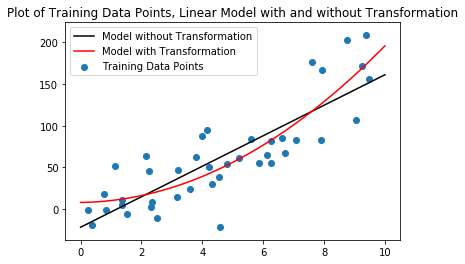

In [395]:
#d)

x = np.linspace(0,10,500).reshape(-1,1)
xsquare = np.square(x)
xtrans_final = np.c_[x,xsquare]
regpred = reg.predict(x)
plt.plot(x, regpred, '-k', label='Model without Transformation')
regtranspred = regtrans.predict(xtrans_final)
plt.plot(x, regtranspred, '-r', label="Model with Transformation")
plt.scatter(x = x_train, y = y_train, label="Training Data Points")
plt.title('Plot of Training Data Points, Linear Model with and without Transformation')
plt.legend(loc = 'best')

In [403]:
#e)

x_test_new = np.array(x_test).reshape(-1,1)
x_test_square = np.square(x_test_new)
x_test_coeff = np.c_[x_test_new,x_test_square]
y_test_new = np.array(y_test)

y_test_pred_R = reg.score(x_test_new, y_test_new)
print("The R Square for model without Transformation on test data is:{}".format(y_test_pred_R))
pred_test = reg.predict(x_test_new)
MSE_test = mean_squared_error(pred_test, y_test_new)
print("The MSE for model without Transformation on test data is {}".format(MSE_test))

y_test_predtrans_R = regtrans.score(x_test_coeff, y_test_new)
print("The R Square for model with Transformation on test data is:{}".format(y_test_predtrans_R))
predtrans_test = regtrans.predict(x_test_coeff)
MSEtrans_test = mean_squared_error(predtrans_test, y_test_new)
print("The MSE for model with Transformation on test data is {}".format(MSEtrans_test))



The R Square for model without Transformation on test data is:0.5556465885794163
The MSE for model without Transformation on test data is 2023.3121088887128
The R Square for model with Transformation on test data is:0.6927820089560344
The MSE for model with Transformation on test data is 1398.8817580143948


f) The model with quadratic term transformation works better for both training and test data set, as we can see the model with transformation has smaller R square and MSE for both training and test data than the ones of model without transformation. Reason is because model with transformation has more parameters, thus more flexible than the model without transformation. A more flexible model fits non-linear relationship better. As we see from the graph, there's an obvious non-linear relationship between x and y. Therefore, a more flexible model will work better, in this case, the more flexible model is the model with transformation

g) If the test data is significantly different from the training dataset, the prediction of test data may still be bad even if the model fits the training data well. All training model indicators such as R square and MSE will be rendered irrelevant when the test data is vastly different from training data. This is because we have the assumption that test and training data will follow similar trend when we do machine learning model. When this assumption is violated, we can't guarantee the prediction performance of our model for test data.
